In [3]:
import pandas as pd
df=pd.read_csv("Mall_Customers (3).csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


ps stores as matrix,0-row,1-column

In [7]:
df.drop(["CustomerID", "Gender"], axis=1, inplace=True)


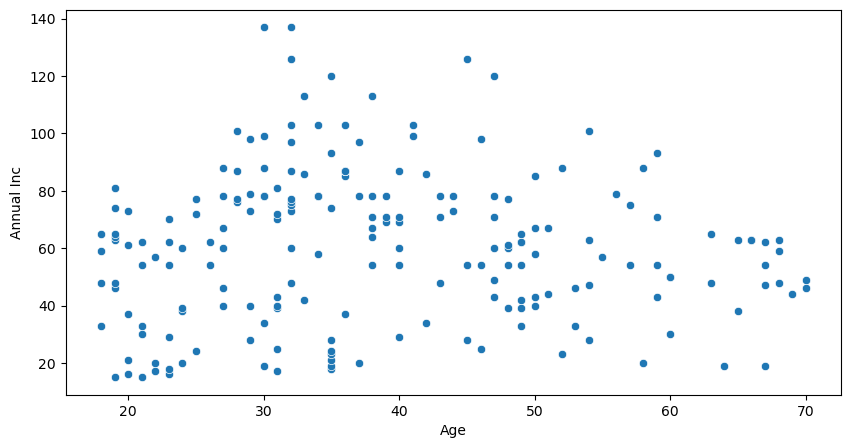

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.xlabel("Age")
plt.ylabel("Annual Inc")
plt.show()

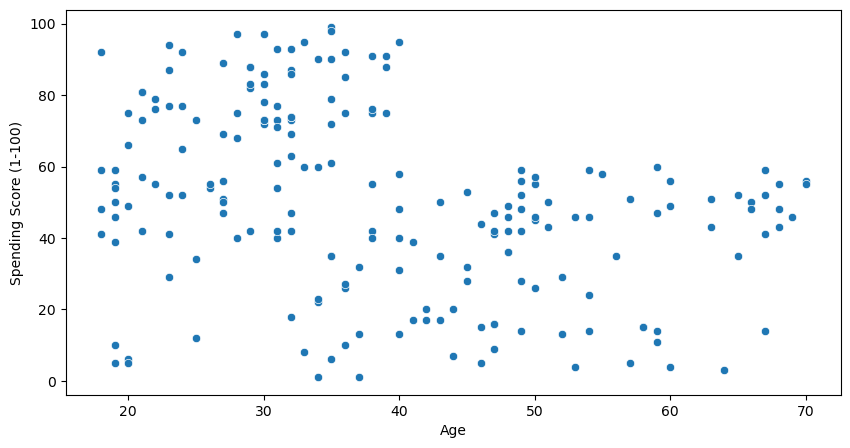

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

minmax scaler -for biased data
normalisation-normal distribution

In [10]:
from scipy.stats import skew
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [11]:
def skewness_n(s):
    if s>0:
        return "Right skewed"
    elif s<0:
        return "Left Skewed"
    else:
        return "Normal"
print("skewness of Age:",skewness_n(df["Age"].skew()))
print("skewness of annual Income:",skewness_n(df["Annual Income (k$)"].skew()))
print("skewness of Spending Score:",skewness_n(df["Spending Score (1-100)"].skew()))

skewness of Age: Right skewed
skewness of annual Income: Right skewed
skewness of Spending Score: Left Skewed


In [12]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s_d=s.fit_transform(df)
df=pd.DataFrame(s_d,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


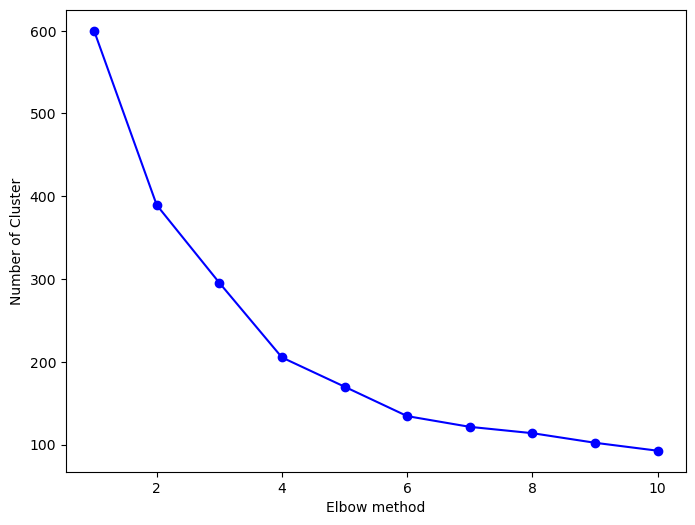

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(df.drop("Cluster",axis=1))
    wcss.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o",color="blue")
plt.xlabel("Elbow method")
plt.ylabel("Number of Cluster")
plt.show()

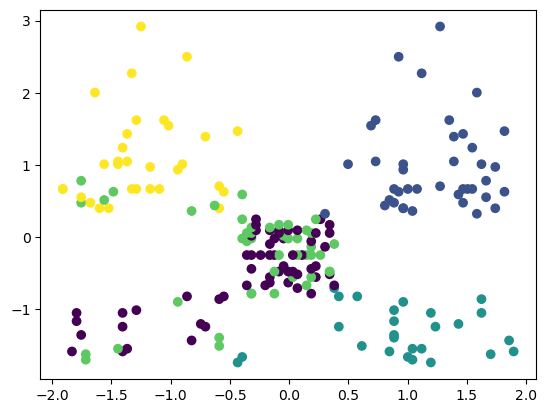

In [15]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"],c=df["Cluster"])


In [23]:
df.to_csv("clustered_data.csv",index=False)

In [18]:
# dividing the data into features and target variable
X=df.drop("Cluster",axis=1)
y=df["Cluster"]


In [19]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
# train the model DT
from sklearn.tree import DecisionTreeClassifier

# load the model
dt = DecisionTreeClassifier(random_state=42)

# fit the model
dt.fit(X_train,y_train)

# predict the model
y_pred = dt.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy score :",accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.60      1.00      0.75         3
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00        10

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.93        40
weighted avg       0.97      0.95      0.95        40

[[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  2 10  0]
 [ 0  0  0  0 10]]
Accuracy score : 0.95
